In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [2]:
df_a = pd.read_csv('../work/metrics.csv')

In [3]:
df_b = pd.read_csv('../work/metrics2.csv')

In [4]:
df = pd.concat([df_a, df_b])

In [5]:
df_coreg = df[df['coregionalized'] == True]

In [6]:
df_no_coreg = df[df['coregionalized'] == False]

In [7]:
def get_lc_data(df, metric='mae_0_1'):
    train_sizes = df['train_size'].unique()
    
    ts = []
    means = []
    stds = []
    for train_size in train_sizes: 
        if train_size>2:
            ts.append(train_size)
            rows = df[df['train_size']==train_size]
            mean = np.mean(rows[metric])
            std = np.std(rows[metric]) / np.sqrt(len(rows))
            means.append(mean)
            stds.append(std) 

        
    return np.array(ts), np.array(means), np.array(stds)

In [8]:
ts_c_mae_0, m_c_mae_0, std_c_mae_0 = get_lc_data(df_coreg, 'mae_0')
ts_nc_mae_0, m_nc_mae_0, std_nc_mae_0 = get_lc_data(df_no_coreg, 'mae_0')

ts_c_mae_1, m_c_mae_1, std_c_mae_1 = get_lc_data(df_coreg, 'mae_0_1')
ts_nc_mae_1, m_nc_mae_1, std_nc_mae_1 = get_lc_data(df_no_coreg, 'mae_0_1')



ts_c_r2_0, m_c_r2_0, std_c_r2_0 = get_lc_data(df_coreg, 'r2_0')
ts_nc_r2_0, m_nc_r2_0, std_nc_r2_0 = get_lc_data(df_no_coreg, 'r2_0')

ts_c_r2_1, m_c_r2_1, std_c_r2_1 = get_lc_data(df_coreg, 'r2_0_1')
ts_nc_r2_1, m_nc_r2_1, std_nc_r2_1 = get_lc_data(df_no_coreg, 'r2_0_1')


ts_c_max_0, m_c_max_0, std_c_max_0 = get_lc_data(df_coreg, 'max_error_0')
ts_nc_max_0, m_nc_max_0, std_nc_max_0 = get_lc_data(df_no_coreg, 'max_error_0')

ts_c_max_1, m_c_max_1, std_c_max_1 = get_lc_data(df_coreg, 'max_error_0_1')
ts_nc_max_1, m_nc_max_1, std_nc_max_1 = get_lc_data(df_no_coreg, 'max_error_0_1')

/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  import sys
/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  


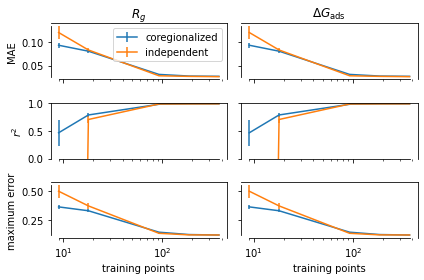

In [14]:
plt.rcParams['font.family'] = 'sans-serif'
    
fig, ax = plt.subplots(3,2, sharey='row', sharex='all')

for b in ax:
    for a in b:
        a.spines['left'].set_smart_bounds(True)
        a.spines['bottom'].set_smart_bounds(True)
        
ax[0][0].set_xscale('log')
ax[0][0].errorbar(ts_c_mae_0, m_c_mae_0, std_c_mae_0, label='coregionalized')
ax[0][0].errorbar(ts_nc_mae_0, m_nc_mae_0, std_nc_mae_0, label='independent')

ax[0][1].errorbar(ts_c_mae_1, m_c_mae_1, std_c_mae_1)
ax[0][1].errorbar(ts_nc_mae_1, m_nc_mae_1, std_nc_mae_1)


ax[1][0].errorbar(ts_c_r2_0, m_c_r2_0, std_c_r2_0)
ax[1][0].errorbar(ts_nc_r2_0, m_nc_r2_0, std_nc_r2_0)

ax[1][1].errorbar(ts_c_r2_1, m_c_r2_1, std_c_r2_1)
ax[1][1].errorbar(ts_nc_r2_1, m_nc_r2_1, std_nc_r2_1)


ax[2][0].errorbar(ts_c_max_0, m_c_max_0, std_c_max_0)
ax[2][0].errorbar(ts_nc_max_0, m_nc_max_0, std_nc_max_0)

ax[2][1].errorbar(ts_c_max_1, m_c_max_1, std_c_max_1)
ax[2][1].errorbar(ts_nc_max_1, m_nc_max_1, std_nc_max_1)


ax[2][0].set_xlabel('training points')
ax[2][1].set_xlabel('training points')

ax[0][0].set_ylabel('MAE')
ax[1][0].set_ylabel('$r^2$')
ax[2][0].set_ylabel('maximum error')

ax[0][0].set_title('$R_g$')
ax[0][1].set_title('$\Delta G_\mathrm{ads}$')

ax[1][0].set_ylim(0,1)

ax[0][0].legend()

fig.tight_layout()

fig.savefig('learning_curves_coregionalized.pdf', bbox_inches='tight')

In [10]:
df.head()

,Unnamed: 0,r2_0,mae_0,max_error_0,r2_0_1,mae_0_1,max_error_0_1,max_var_0,min_var_0,mean_var_0,median_var_0,std_var_0,max_var_1,min_var_1,mean_var_1,median_var_1,std_var_1,train_size,coregionalized
0,0,0.607948,0.101497,0.387539,0.607948,0.101497,0.387539,0.192859,0.034531,0.090007,0.085683,0.028244,3.148156,2.983135,3.019102,3.011961,2.654537e-02,9,True
1,1,-1.752024,0.157292,0.663223,-1.752024,0.157292,0.663223,0.196443,0.043623,0.123330,0.121847,0.025758,3.088537,3.088512,3.088537,3.088537,8.863661e-07,9,False
2,2,0.793177,0.085524,0.327912,0.793177,0.085524,0.327912,0.302465,0.054815,0.146412,0.141474,0.041243,3.216389,2.653169,2.789955,2.770352,8.754866e-02,9,True
3,3,0.691707,0.079728,0.344158,0.691707,0.079728,0.344158,0.264870,0.041862,0.170049,0.169659,0.034350,2.272709,1.436345,2.257066,2.267920,4.308486e-02,9,False
4,4,0.798847,0.073091,0.298512,0.798847,0.073091,0.298512,0.220555,0.059096,0.109235,0.106368,0.025435,2.852555,2.570020,2.629033,2.621146,3.899140e-02,9,True


In [11]:
ts_c_max_var_0, m_c_max_var_0, std_c_max_var_0 = get_lc_data(df_coreg, 'max_var_0')
ts_nc_max_var_0, m_nc_max_var_0, std_nc_max_var_0 = get_lc_data(df_no_coreg, 'max_var_0')

ts_c_max_var_1, m_c_max_var_1, std_c_max_var_1 = get_lc_data(df_coreg, 'max_var_1')
ts_nc_max_var_1, m_nc_max_var_1, std_nc_max_var_1 = get_lc_data(df_no_coreg, 'max_var_1')



ts_c_mean_var_0, m_c_mean_var_0, std_c_mean_var_0 = get_lc_data(df_coreg, 'mean_var_0')
ts_nc_mean_var_0, m_nc_mean_var_0, std_nc_mean_var_0 = get_lc_data(df_no_coreg, 'mean_var_0')

ts_c_mean_var_1, m_c_mean_var_1, std_c_mean_var_1 = get_lc_data(df_coreg, 'mean_var_1')
ts_nc_mean_var_1, m_nc_mean_var_1, std_nc_mean_var_1 = get_lc_data(df_no_coreg, 'mean_var_1')



/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  import sys
/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  


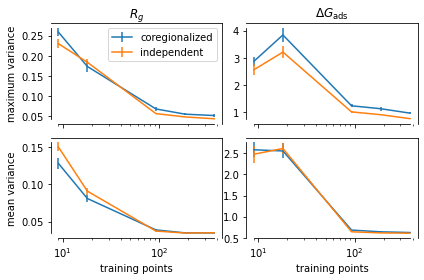

In [12]:
plt.rcParams['font.family'] = 'sans-serif'
    
fig, ax = plt.subplots(2,2, sharex='all')

for b in ax:
    for a in b:
        a.spines['left'].set_smart_bounds(True)
        a.spines['bottom'].set_smart_bounds(True)
        
ax[0][0].set_xscale('log')
ax[0][0].errorbar(ts_c_max_var_0, m_c_max_var_0, std_c_max_var_0, label='coregionalized')
ax[0][0].errorbar(ts_nc_max_var_0, m_nc_max_var_0, std_nc_max_var_0, label='independent')

ax[0][1].errorbar(ts_c_max_var_1, m_c_max_var_1, std_c_max_var_1, label='coregionalized')
ax[0][1].errorbar(ts_nc_max_var_1, m_nc_max_var_1, std_nc_max_var_1, label='independent')



ax[1][0].errorbar(ts_c_mean_var_0, m_c_mean_var_0, std_c_mean_var_0, label='coregionalized')
ax[1][0].errorbar(ts_nc_mean_var_0, m_nc_mean_var_0, std_nc_mean_var_0, label='independent')

ax[1][1].errorbar(ts_c_mean_var_1, m_c_mean_var_1, std_c_mean_var_1, label='coregionalized')
ax[1][1].errorbar(ts_nc_mean_var_1, m_nc_mean_var_1, std_nc_mean_var_1, label='independent')

ax[0][0].legend()

ax[0][0].set_title('$R_g$')
ax[0][1].set_title('$\Delta G_\mathrm{ads}$')

ax[0][0].set_ylabel('maximum variance')
ax[1][0].set_ylabel('mean variance')

ax[1][0].set_xlabel('training points')
ax[1][1].set_xlabel('training points')

fig.tight_layout()

fig.savefig('variance_lc.pdf', bbox_inches='tight')
